# Загрузка Pandas и очистка данных

In [1]:
import pandas as pd
import numpy as np

import warnings
import re

# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split

# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
warnings.simplefilter('ignore')

In [3]:
df = pd.read_csv('main_task.csv')

In [4]:
# Ваш код по очистке данных и генерации новых признаков
# При необходимости добавьте ячейки

# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели

In [5]:
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
X = df.drop(['Restaurant_id', 'Rating'], axis = 1)
y = df['Rating']

In [6]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               40000 non-null  object 
 1   Cuisine Style      30717 non-null  object 
 2   Ranking            40000 non-null  float64
 3   Price Range        26114 non-null  object 
 4   Number of Reviews  37457 non-null  float64
 5   Reviews            40000 non-null  object 
 6   URL_TA             40000 non-null  object 
 7   ID_TA              40000 non-null  object 
dtypes: float64(2), object(6)
memory usage: 2.4+ MB


In [8]:
X = df[['Ranking', 'Number of Reviews']]

In [9]:
X.isna().sum()

Ranking                 0
Number of Reviews    2543
dtype: int64

In [10]:
X['Number of Reviews'].fillna(X['Number of Reviews'].mean(), inplace=True)

In [11]:
X.isna().sum()

Ranking              0
Number of Reviews    0
dtype: int64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Создаём, обучаем и тестируем модель

In [13]:
# Создаём модель
regr = RandomForestRegressor(n_estimators=100)

# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)

In [14]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.4345837138888889


In [15]:
df.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
16221,id_7346,London,"['Steakhouse', 'Barbecue', 'British']",7355.0,4.0,$$ - $$$,65.0,"[['Nice steaks!', 'Good Steak in Piccadilli Ci...",/Restaurant_Review-g186338-d4063503-Reviews-St...,d4063503
3760,id_4554,Madrid,NaN,4556.0,5.0,NaN,4.0,"[[], []]",/Restaurant_Review-g187514-d9836681-Reviews-La...,d9836681
29601,id_2944,Milan,NaN,2946.0,4.0,NaN,22.0,"[['Loved this hidden little restaurant', 'Amaz...",/Restaurant_Review-g187849-d8130155-Reviews-Tr...,d8130155
37123,id_812,Amsterdam,"['French', 'Italian', 'Vegetarian Friendly', '...",814.0,5.0,$,19.0,"[['A little gem, great food and Gezellig! (Du....",/Restaurant_Review-g188590-d12331683-Reviews-M...,d12331683
20231,id_3279,Berlin,NaN,3281.0,5.0,NaN,2.0,"[[], []]",/Restaurant_Review-g187323-d11733005-Reviews-M...,d11733005


In [16]:
df['Price Range'].value_counts()

$$ - $$$    18412
$            6279
$$$$         1423
Name: Price Range, dtype: int64

In [17]:
df['Price Range'].isnull().sum()

13886

In [18]:
df['Price Range'].isna().sum()

13886

In [19]:
len(df['Price Range'])-df['Price Range'].isna().sum()

26114

In [20]:
df['City'].value_counts()

London        5757
Paris         4897
Madrid        3108
Barcelona     2734
Berlin        2155
Milan         2133
Rome          2078
Prague        1443
Lisbon        1300
Vienna        1166
Amsterdam     1086
Brussels      1060
Hamburg        949
Munich         893
Lyon           892
Stockholm      820
Budapest       816
Warsaw         727
Dublin         673
Copenhagen     659
Athens         628
Edinburgh      596
Zurich         538
Oporto         513
Geneva         481
Krakow         443
Oslo           385
Helsinki       376
Bratislava     301
Luxembourg     210
Ljubljana      183
Name: City, dtype: int64

In [21]:
df['City'].isna().sum()

0

In [22]:
df['City'].nunique()

31

In [23]:
df['City'].unique()

array(['Paris', 'Stockholm', 'London', 'Berlin', 'Munich', 'Oporto',
       'Milan', 'Bratislava', 'Vienna', 'Rome', 'Barcelona', 'Madrid',
       'Dublin', 'Brussels', 'Zurich', 'Warsaw', 'Budapest', 'Copenhagen',
       'Amsterdam', 'Lyon', 'Hamburg', 'Lisbon', 'Prague', 'Oslo',
       'Helsinki', 'Edinburgh', 'Geneva', 'Ljubljana', 'Athens',
       'Luxembourg', 'Krakow'], dtype=object)

In [24]:
df['Cuisine Style']

0                  ['European', 'French', 'International']
1                                                      NaN
2        ['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...
3                                                      NaN
4        ['German', 'Central European', 'Vegetarian Fri...
                               ...                        
39995    ['Italian', 'Vegetarian Friendly', 'Vegan Opti...
39996    ['French', 'American', 'Bar', 'European', 'Veg...
39997                                ['Japanese', 'Sushi']
39998    ['Polish', 'European', 'Eastern European', 'Ce...
39999                                          ['Spanish']
Name: Cuisine Style, Length: 40000, dtype: object

In [25]:
for cuisines_list in df['Cuisine Style'].dropna()[0:10]:
    for cuisine in cuisines_list.replace('[','').replace(']','').replace(' ','').replace("'",'').split(','): print(cuisine)

European
French
International
Japanese
Sushi
Asian
Grill
VegetarianFriendly
VeganOptions
GlutenFreeOptions
German
CentralEuropean
VegetarianFriendly
Italian
Pizza
Italian
Italian
Pizza
FastFood
Italian
Pizza
VegetarianFriendly
Italian
Pizza
VegetarianFriendly
GlutenFreeOptions
VegetarianFriendly
GlutenFreeOptions
Mediterranean
Spanish
Healthy


In [26]:
df['Cuisine Style'].dropna().str.cat(sep=',').replace('[','').replace(']','').replace(' ','').replace("'",'').split(',')

['European',
 'French',
 'International',
 'Japanese',
 'Sushi',
 'Asian',
 'Grill',
 'VegetarianFriendly',
 'VeganOptions',
 'GlutenFreeOptions',
 'German',
 'CentralEuropean',
 'VegetarianFriendly',
 'Italian',
 'Pizza',
 'Italian',
 'Italian',
 'Pizza',
 'FastFood',
 'Italian',
 'Pizza',
 'VegetarianFriendly',
 'Italian',
 'Pizza',
 'VegetarianFriendly',
 'GlutenFreeOptions',
 'VegetarianFriendly',
 'GlutenFreeOptions',
 'Mediterranean',
 'Spanish',
 'Healthy',
 'Cafe',
 'Japanese',
 'Asian',
 'Thai',
 'Vietnamese',
 'Bar',
 'Pub',
 'German',
 'Chinese',
 'German',
 'VegetarianFriendly',
 'Bar',
 'British',
 'Pub',
 'Asian',
 'Thai',
 'VegetarianFriendly',
 'GlutenFreeOptions',
 'VeganOptions',
 'Cafe',
 'British',
 'Polish',
 'International',
 'European',
 'Fusion',
 'Dutch',
 'European',
 'Vietnamese',
 'Italian',
 'Pizza',
 'Italian',
 'Mexican',
 'Venezuelan',
 'SouthAmerican',
 'Italian',
 'Japanese',
 'Sushi',
 'Asian',
 'French',
 'Bar',
 'Cafe',
 'Mediterranean',
 'Pub',
 'A

In [27]:
df['Cuisine Style'].dropna()[0].split()

["['European',", "'French',", "'International']"]

In [28]:
cuisines = set()
for cuisines_list in df['Cuisine Style'].dropna():
    for cuisine in cuisines_list.replace('[','').replace(']','').replace(' ','').replace("'",'').split(','):
        cuisines.add(cuisine)

In [29]:
cuisines

{'Afghani',
 'African',
 'Albanian',
 'American',
 'Arabic',
 'Argentinean',
 'Armenian',
 'Asian',
 'Australian',
 'Austrian',
 'Azerbaijani',
 'Balti',
 'Bangladeshi',
 'Bar',
 'Barbecue',
 'Belgian',
 'Brazilian',
 'BrewPub',
 'British',
 'Burmese',
 'Cafe',
 'Cajun&Creole',
 'Cambodian',
 'Canadian',
 'Caribbean',
 'Caucasian',
 'CentralAmerican',
 'CentralAsian',
 'CentralEuropean',
 'Chilean',
 'Chinese',
 'Colombian',
 'Contemporary',
 'Croatian',
 'Cuban',
 'Czech',
 'Danish',
 'Delicatessen',
 'Diner',
 'Dutch',
 'EasternEuropean',
 'Ecuadorean',
 'Egyptian',
 'Ethiopian',
 'European',
 'FastFood',
 'Filipino',
 'French',
 'Fujian',
 'Fusion',
 'Gastropub',
 'Georgian',
 'German',
 'GlutenFreeOptions',
 'Greek',
 'Grill',
 'Halal',
 'Hawaiian',
 'Healthy',
 'Hungarian',
 'Indian',
 'Indonesian',
 'International',
 'Irish',
 'Israeli',
 'Italian',
 'Jamaican',
 'Japanese',
 'Korean',
 'Kosher',
 'Latin',
 'Latvian',
 'Lebanese',
 'Malaysian',
 'Mediterranean',
 'Mexican',
 'Mid

In [30]:
len(cuisines)

125

In [31]:
cuisines = set(cuisines)

In [32]:
cuisines

{'Afghani',
 'African',
 'Albanian',
 'American',
 'Arabic',
 'Argentinean',
 'Armenian',
 'Asian',
 'Australian',
 'Austrian',
 'Azerbaijani',
 'Balti',
 'Bangladeshi',
 'Bar',
 'Barbecue',
 'Belgian',
 'Brazilian',
 'BrewPub',
 'British',
 'Burmese',
 'Cafe',
 'Cajun&Creole',
 'Cambodian',
 'Canadian',
 'Caribbean',
 'Caucasian',
 'CentralAmerican',
 'CentralAsian',
 'CentralEuropean',
 'Chilean',
 'Chinese',
 'Colombian',
 'Contemporary',
 'Croatian',
 'Cuban',
 'Czech',
 'Danish',
 'Delicatessen',
 'Diner',
 'Dutch',
 'EasternEuropean',
 'Ecuadorean',
 'Egyptian',
 'Ethiopian',
 'European',
 'FastFood',
 'Filipino',
 'French',
 'Fujian',
 'Fusion',
 'Gastropub',
 'Georgian',
 'German',
 'GlutenFreeOptions',
 'Greek',
 'Grill',
 'Halal',
 'Hawaiian',
 'Healthy',
 'Hungarian',
 'Indian',
 'Indonesian',
 'International',
 'Irish',
 'Israeli',
 'Italian',
 'Jamaican',
 'Japanese',
 'Korean',
 'Kosher',
 'Latin',
 'Latvian',
 'Lebanese',
 'Malaysian',
 'Mediterranean',
 'Mexican',
 'Mid

In [33]:
cuisines_dict = dict.fromkeys(cuisines)

In [34]:
for i in cuisines_dict:
    i = 1

In [35]:
cuisines_dict

{'Austrian': None,
 'Japanese': None,
 'Ecuadorean': None,
 'Romanian': None,
 'Sushi': None,
 'Slovenian': None,
 'Colombian': None,
 'Filipino': None,
 'Halal': None,
 'NativeAmerican': None,
 'Fusion': None,
 'African': None,
 'Asian': None,
 'Vietnamese': None,
 'Lebanese': None,
 'Egyptian': None,
 'Cuban': None,
 'Singaporean': None,
 'Armenian': None,
 'MiddleEastern': None,
 'Korean': None,
 'Mongolian': None,
 'Italian': None,
 'Azerbaijani': None,
 'International': None,
 'Portuguese': None,
 'Argentinean': None,
 'American': None,
 'WineBar': None,
 'French': None,
 'Russian': None,
 'Latvian': None,
 'MinorityChinese': None,
 'Dutch': None,
 'Mexican': None,
 'StreetFood': None,
 'Irish': None,
 'British': None,
 'Kosher': None,
 'Polish': None,
 'Salvadoran': None,
 'VegetarianFriendly': None,
 'Grill': None,
 'Swiss': None,
 'Spanish': None,
 'German': None,
 'Greek': None,
 'EasternEuropean': None,
 'CentralEuropean': None,
 'Soups': None,
 'European': None,
 'Diner': No

In [36]:
cuisines = pd.Series(df['Cuisine Style'].dropna().str.cat(sep=',').replace('[','').replace(
                       ']','').replace(' ','').replace("'",'').split(','))

In [37]:
cuisines.value_counts()

VegetarianFriendly    11189
European              10060
Mediterranean          6277
Italian                5964
VeganOptions           4486
                      ...  
Xinjiang                  1
Yunnan                    1
Salvadoran                1
Latvian                   1
Burmese                   1
Length: 125, dtype: int64

Какое среднее количество кухонь предлагается в одном ресторане? Если в данных отсутствует информация о типах кухонь, то считайте, что в этом ресторане предлагается только один тип кухни. Ответ округлите до одного знака после запятой.

In [38]:
df['Cuisine Style'].fillna(1)

0                  ['European', 'French', 'International']
1                                                        1
2        ['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...
3                                                        1
4        ['German', 'Central European', 'Vegetarian Fri...
                               ...                        
39995    ['Italian', 'Vegetarian Friendly', 'Vegan Opti...
39996    ['French', 'American', 'Bar', 'European', 'Veg...
39997                                ['Japanese', 'Sushi']
39998    ['Polish', 'European', 'Eastern European', 'Ce...
39999                                          ['Spanish']
Name: Cuisine Style, Length: 40000, dtype: object

In [39]:
df['Cuisine Style'].fillna('1').apply(lambda x: len(x.split(','))).mean()

2.6224

In [40]:
df.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
7675,id_1407,Warsaw,NaN,1409.0,4.0,NaN,5.0,"[[], []]",/Restaurant_Review-g274856-d12149215-Reviews-N...,d12149215
38338,id_2864,Lisbon,NaN,2867.0,4.0,NaN,4.0,"[['Good hotel restaurant', 'Hotel Olissippo Re...",/Restaurant_Review-g189158-d2617116-Reviews-Va...,d2617116
5154,id_511,Zurich,NaN,514.0,4.5,NaN,11.0,"[['Delicious & friendly staff', 'Amazing find....",/Restaurant_Review-g188113-d11863038-Reviews-S...,d11863038
30221,id_2811,London,"['Polish', 'European', 'Eastern European', 'Ce...",2816.0,4.5,$,183.0,"[['Fantastic', 'delicious food'], ['12/09/2017...",/Restaurant_Review-g186338-d3174271-Reviews-Au...,d3174271
21882,id_5860,Paris,"['French', 'Bar', 'European']",5861.0,3.0,$$ - $$$,141.0,"[['Excellent.', 'Hidden uphill from Belleville...",/Restaurant_Review-g187147-d719482-Reviews-Le_...,d719482


In [41]:
df.iloc[0]['Reviews'].split(' [')[-1].replace(']]','').replace("'",'').split(', ')

['12/31/2017', '11/20/2017']

In [42]:
df.iloc[0]['Reviews']

"[['Good food at your doorstep', 'A good hotel restaurant'], ['12/31/2017', '11/20/2017']]"

In [43]:
df.iloc[1000]['Reviews']

"[['Lovely, lovelier, loveliest', 'Average at best'], ['07/19/2017', '06/15/2016']]"

In [44]:
pd.to_datetime(df.iloc[0]['Reviews'].split(' [')[1].replace(']]','').replace("'",'').split(', ')).min()

Timestamp('2017-11-20 00:00:00')

In [45]:
df['Reviews'].iloc[0].split(' [')[-1].replace(']]','').replace("'",'').split(', ')

['12/31/2017', '11/20/2017']

In [46]:
# Дата последнего отзыва
def latest_date(line):
    # -1 используется из-за массива размером 3 в id=28330
    return pd.to_datetime(line.split(' [')[-1].replace(']]','').replace("'",'').split(', ')).max()

In [47]:
df['Reviews'][0:5].apply(lambda x: latest_date(x)).max()

Timestamp('2018-01-08 00:00:00')

In [48]:
df['Reviews'].apply(lambda x: latest_date(x)).max()

Timestamp('2018-02-26 00:00:00')

In [49]:
df['Reviews'].iloc[28330].split(' [')

["[['Good food, attentive staff', 'Sternstraße 125, Schanzenviertel,",
 "59], ju...'],",
 "'05/10/2015', '07/05/2014']]"]

In [50]:
# Разница между датами первого и последнего отзывов
def delta_date(line):
    # -1 используется из-за массива размером 3 в id=28330
    times = pd.to_datetime(line.split(' [')[-1].replace(']]','').replace("'",'').split(', '))
    return times.max()-times.min()

In [51]:
df['Reviews'][0:5].apply(lambda x: delta_date(x))#.max()

0    41 days
1   382 days
2     2 days
3        NaT
4   272 days
Name: Reviews, dtype: timedelta64[ns]

In [52]:
df['Reviews'].apply(lambda x: delta_date(x)).max()

Timedelta('3207 days 00:00:00')

# Making the data for training

## Functions

In [53]:
def change_price_range(line):
    if line == '$': return 1
    if line == '$$ - $$$': return 2
    if line == '$$$$': return 3

def fill_cuisine_style(line):
    if str(line)!='nan': return len(line.split(','))

# Разница между датами первого и последнего отзывов
def delta_date(line):
    # -1 используется из-за массива размером 3 в id=28330
    times = pd.to_datetime(line.split(' [')[-1].replace(']]','').replace("'",'').split(', '))
    return times.max()-times.min()

# Дата последнего отзыва
def latest_date(line):
    # -1 используется из-за массива размером 3 в id=28330
    return pd.to_datetime(line.split(' [')[-1].replace(']]','').replace("'",'').split(', ')).max()

# Определение длины отзыва (такой код возможно использовать 
# только потому что в данной датасете предоставлено по 2 отзыва)
def review_len(line):
    length = len(line.split('], [')[0][3:-1])
    if length>0: return length
    
# Длина url ресторана
def len_url(line):
    # т.к. Nan значений нет, сразу возвращаем длину:
    return len(line)

# Заполнение NaN значений столбцов датафрейма средними значениями
def fill_na_mean(dataframe):
    df = dataframe.copy()
    for i in df:
        df[i].fillna(df[i].mean(), inplace = True)
    return df

# Тренировка с заданными параметрами:
def ML_train(regressor, dataframe, column, test_size=0.2):
    #nan_filled = fill_na_mean(dataframe) # Заполнить NaN значения средними из колонки
    X = dataframe[dataframe[column].notna()].drop(column, axis=1)
    y = dataframe[dataframe[column].notna()][column] # В пердсказываемой колонке NaN значений быть не должно,
                                                     # Заполнение каким-либо образом смысла не имеет
                                                     # И ухудшает модель
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train = fill_na_mean(X_train) # Заполняем NaN значения в тренировочной 
    X_test = fill_na_mean(X_test)   # и тестовой частях отдельно друг от друга 
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
    return regressor

# Вычисление MAE при предсказании по среднему значению:
def mean_MAE(series):
    return (series[:int(len(series)/2)]-series[int(len(series)/2):].mean()).sum()/int(len(series)/2)

# Проверка наличия определенной кухни в ячейке 'Cuisine Style' отдельного ресторана
def find_cuisine(cell):
    if cuisine in cell:
        return 1
    return 0

def find_word(cell):
    if word in cell:
        return 1
    return 0

# Разделение слов в отзывах для get_dummies()
def devide_words(line):
    words = set()
    line = line.lower()
    # Добавим отзывы "no ..."
    for i in re.findall(r'no.[a-z]+', line):
        words.add(i)
    # Добавим отзывы "not ..."
    for i in re.findall(r'not.[a-z]+', line):
        words.add(i)
    # Добавим отзывы, исключая "не"
    for i in re.findall(r'[a-z]+', re.sub(r'n[o,t]+.[a-z]+', '', line)):
        words.add(i)
    return words

## Формирование новых признаков:

Колонка Price Range

In [54]:
len(df)

40000

In [55]:
df.sample(3)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
19226,id_6780,Barcelona,['Spanish'],6781.0,4.0,$$ - $$$,7.0,"[['Worst Food I Have Ever Been Served', 'Great...",/Restaurant_Review-g187497-d6637408-Reviews-Ca...,d6637408
22314,id_5835,London,"['Cafe', 'British', 'Contemporary', 'Vegetaria...",5844.0,4.0,$,35.0,"[['I will be back', 'Nice fresh croissants!'],...",/Restaurant_Review-g186338-d3510238-Reviews-Ch...,d3510238
20001,id_5903,Barcelona,['Mediterranean'],5904.0,4.0,NaN,6.0,"[['Books, Literature, good coffee and a lot m....",/Restaurant_Review-g187497-d2335631-Reviews-Be...,d2335631


In [56]:
df['Price Range'].value_counts()

$$ - $$$    18412
$            6279
$$$$         1423
Name: Price Range, dtype: int64

In [57]:
df['Price Range'].iloc[0]

'$$ - $$$'

In [58]:
df['Price Range'][df['Price Range']=='$$ - $$$']

0        $$ - $$$
4        $$ - $$$
11       $$ - $$$
12       $$ - $$$
13       $$ - $$$
           ...   
39994    $$ - $$$
39995    $$ - $$$
39996    $$ - $$$
39998    $$ - $$$
39999    $$ - $$$
Name: Price Range, Length: 18412, dtype: object

In [59]:
df2 = df.copy()

In [60]:
df2['Price Range'] = df2['Price Range'].apply(lambda x: change_price_range(x))

In [61]:
df2['Price Range'].value_counts()

2.0    18412
1.0     6279
3.0     1423
Name: Price Range, dtype: int64

Колонка Restaurant_id

In [62]:
# На оценку не влияет
df2.drop(['Restaurant_id'], axis=1, inplace=True)

Колонка City

In [63]:
# Требуется перевод в цифровой вариант
df2.drop(['City'], axis=1, inplace=True)

In [64]:
df2

,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,"['European', 'French', 'International']",5570.0,3.5,2.0,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,3.0,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,2.0,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963
...,...,...,...,...,...,...,...,...
39995,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,4.5,2.0,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414
39996,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,3.5,2.0,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036
39997,"['Japanese', 'Sushi']",1652.0,4.5,NaN,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615
39998,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,4.0,2.0,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838


Колонка Cuisine Style

In [65]:
df['Cuisine Style'].fillna('0').apply(lambda x: len(x.split(',')))

0        3
1        1
2        7
3        1
4        3
        ..
39995    4
39996    5
39997    2
39998    5
39999    1
Name: Cuisine Style, Length: 40000, dtype: int64

In [66]:
df['Cuisine Style'].fillna(np.nan)

0                  ['European', 'French', 'International']
1                                                      NaN
2        ['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...
3                                                      NaN
4        ['German', 'Central European', 'Vegetarian Fri...
                               ...                        
39995    ['Italian', 'Vegetarian Friendly', 'Vegan Opti...
39996    ['French', 'American', 'Bar', 'European', 'Veg...
39997                                ['Japanese', 'Sushi']
39998    ['Polish', 'European', 'Eastern European', 'Ce...
39999                                          ['Spanish']
Name: Cuisine Style, Length: 40000, dtype: object

In [67]:
str(df['Cuisine Style'].iloc[1])=='nan'

True

In [68]:
df['Cuisine Style'].iloc[0]>''

True

In [69]:
# Заполним Cuisine Style кол-вом предлагаемых кухонь:
df2['Cuisine Style'] = df2['Cuisine Style'].apply(lambda x: fill_cuisine_style(x))

In [70]:
df2['Cuisine Style']

0        3.0
1        NaN
2        7.0
3        NaN
4        3.0
        ... 
39995    4.0
39996    5.0
39997    2.0
39998    5.0
39999    1.0
Name: Cuisine Style, Length: 40000, dtype: float64

Колонка Reviews

In [71]:
df['Reviews'].iloc[28330]

"[['Good food, attentive staff', 'Sternstraße 125, Schanzenviertel, [59], ju...'], ['05/10/2015', '07/05/2014']]"

In [72]:
# temp - временный датафрейм
temp = df['Reviews'].apply(lambda x: delta_date(x))

In [73]:
temp[temp.dt.days>365]

1        382 days
7        613 days
36       489 days
70       698 days
81       373 days
           ...   
39928    379 days
39960    632 days
39963    422 days
39997   3127 days
39999   1306 days
Name: Reviews, Length: 2663, dtype: timedelta64[ns]

In [74]:
df['Reviews'].iloc[39997]

"[['Good by swedish standards', 'A hidden jewel in the middle of Västertorp...'], ['11/03/2016', '04/12/2008']]"

In [75]:
df['Reviews'].iloc[0]

"[['Good food at your doorstep', 'A good hotel restaurant'], ['12/31/2017', '11/20/2017']]"

In [76]:
df['Reviews'].iloc[36]

"[['Not bad', 'Avoid'], ['04/05/2015', '12/02/2013']]"

In [77]:
df['Reviews'].iloc[50]

"[['Okay for quick cheap light lunch', 'Not ok even if you’re a student and poor'], ['01/06/2018', '12/12/2017']]"

In [78]:
temp[temp.dt.days>3000]

2028    3040 days
6958    3035 days
7990    3207 days
8356    3096 days
10997   3137 days
19438   3094 days
39997   3127 days
Name: Reviews, dtype: timedelta64[ns]

In [79]:
df['Reviews'].iloc[7990]

"[['Incredible buffet!', 'Used to be great, but still good under new...'], ['10/02/2016', '12/22/2007']]"

In [80]:
# Маловероятно, что большая разница дат отзывов является следствием опечатки, 
# т.к. вторая дата является датой более раннего отзыва, т.е. требуется
# опечатка не 1, а 2-х символов.
# Для более точного анализа возможных неточностей, связанных с датами отзывов
# требуется дата начала работы ресторанов.

Создам 2 новых признака: год последнего отзыва и разница дат отзывов

In [81]:
df2['Delta_reviews'] = df['Reviews'].apply(lambda x: delta_date(x)).dt.days

In [82]:
df2

,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,Delta_reviews
0,3.0,5570.0,3.5,2.0,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,41.0
1,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,382.0
2,7.0,353.0,4.5,3.0,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,2.0
3,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,NaN
4,3.0,621.0,4.0,2.0,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,272.0
...,...,...,...,...,...,...,...,...,...
39995,4.0,500.0,4.5,2.0,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,34.0
39996,5.0,6341.0,3.5,2.0,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,9.0
39997,2.0,1652.0,4.5,NaN,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,3127.0
39998,5.0,641.0,4.0,2.0,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,23.0


In [83]:
temp = df['Reviews'].apply(lambda x: latest_date(x))

In [84]:
temp.dt.year.min()

2004.0

In [85]:
df2['Last_review'] = df['Reviews'].apply(lambda x: latest_date(x)).dt.year

In [86]:
df2

,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,Delta_reviews,Last_review
0,3.0,5570.0,3.5,2.0,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,41.0,2017.0
1,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,382.0,2017.0
2,7.0,353.0,4.5,3.0,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,2.0,2018.0
3,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,NaN,NaN
4,3.0,621.0,4.0,2.0,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,272.0,2017.0
...,...,...,...,...,...,...,...,...,...,...
39995,4.0,500.0,4.5,2.0,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,34.0,2017.0
39996,5.0,6341.0,3.5,2.0,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,9.0,2017.0
39997,2.0,1652.0,4.5,NaN,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,3127.0,2016.0
39998,5.0,641.0,4.0,2.0,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,23.0,2017.0


In [87]:
# Признак длины отзыва:
df2['Reviews'] = df['Reviews'].apply(lambda x: review_len(x))

In [88]:
df2

,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,Delta_reviews,Last_review
0,3.0,5570.0,3.5,2.0,194.0,53.0,/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,41.0,2017.0
1,NaN,1537.0,4.0,NaN,10.0,41.0,/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,382.0,2017.0
2,7.0,353.0,4.5,3.0,688.0,40.0,/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,2.0,2018.0
3,NaN,3458.0,5.0,NaN,3.0,NaN,/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,NaN,NaN
4,3.0,621.0,4.0,2.0,84.0,81.0,/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,272.0,2017.0
...,...,...,...,...,...,...,...,...,...,...
39995,4.0,500.0,4.5,2.0,79.0,68.0,/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,34.0,2017.0
39996,5.0,6341.0,3.5,2.0,542.0,67.0,/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,9.0,2017.0
39997,2.0,1652.0,4.5,NaN,4.0,74.0,/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,3127.0,2016.0
39998,5.0,641.0,4.0,2.0,70.0,53.0,/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,23.0,2017.0


Колонка URL_TA

In [89]:
df['URL_TA'].isna().sum()

0

In [90]:
df['URL_TA'].iloc[0]

'/Restaurant_Review-g187147-d1912643-Reviews-R_Yves-Paris_Ile_de_France.html'

In [91]:
# Судя по всему длина url зависит от длины названия ресторана, 
# поэтому имеет смысл попробовать извлечь длину url
df2['URL_TA'] = df['URL_TA'].apply(lambda x: len_url(x))

In [92]:
df2

,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,Delta_reviews,Last_review
0,3.0,5570.0,3.5,2.0,194.0,53.0,75,d1912643,41.0,2017.0
1,NaN,1537.0,4.0,NaN,10.0,41.0,71,d7992032,382.0,2017.0
2,7.0,353.0,4.5,3.0,688.0,40.0,76,d8632781,2.0,2018.0
3,NaN,3458.0,5.0,NaN,3.0,NaN,65,d1358776,NaN,NaN
4,3.0,621.0,4.0,2.0,84.0,81.0,104,d6864963,272.0,2017.0
...,...,...,...,...,...,...,...,...,...,...
39995,4.0,500.0,4.5,2.0,79.0,68.0,75,d2104414,34.0,2017.0
39996,5.0,6341.0,3.5,2.0,542.0,67.0,80,d1800036,9.0,2017.0
39997,2.0,1652.0,4.5,NaN,4.0,74.0,71,d947615,3127.0,2016.0
39998,5.0,641.0,4.0,2.0,70.0,53.0,122,d1100838,23.0,2017.0


Колонка ID_TA

In [93]:
# От идентификатора ресторана пользы мало:
df2.drop('ID_TA', axis = 1, inplace = True)

In [94]:
df2

,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,Delta_reviews,Last_review
0,3.0,5570.0,3.5,2.0,194.0,53.0,75,41.0,2017.0
1,NaN,1537.0,4.0,NaN,10.0,41.0,71,382.0,2017.0
2,7.0,353.0,4.5,3.0,688.0,40.0,76,2.0,2018.0
3,NaN,3458.0,5.0,NaN,3.0,NaN,65,NaN,NaN
4,3.0,621.0,4.0,2.0,84.0,81.0,104,272.0,2017.0
...,...,...,...,...,...,...,...,...,...
39995,4.0,500.0,4.5,2.0,79.0,68.0,75,34.0,2017.0
39996,5.0,6341.0,3.5,2.0,542.0,67.0,80,9.0,2017.0
39997,2.0,1652.0,4.5,NaN,4.0,74.0,71,3127.0,2016.0
39998,5.0,641.0,4.0,2.0,70.0,53.0,122,23.0,2017.0


Анализ получившихся колонок:

In [95]:
# Кореляция получившихся данных:
df2.corr()

,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,Delta_reviews,Last_review
Cuisine Style,1.000000,-0.332574,0.143386,0.156582,0.354874,0.096784,0.032677,-0.228119,0.343586
Ranking,-0.332574,1.000000,-0.368371,-0.103883,-0.222670,-0.081228,-0.151094,0.098414,-0.199902
Rating,0.143386,-0.368371,1.000000,-0.022529,0.030964,0.021531,0.042407,-0.087034,0.107288
Price Range,0.156582,-0.103883,-0.022529,1.000000,0.173649,0.072756,-0.001776,-0.058376,0.076725
Number of Reviews,0.354874,-0.222670,0.030964,0.173649,1.000000,0.058670,0.012263,-0.137367,0.233768
Reviews,0.096784,-0.081228,0.021531,0.072756,0.058670,1.000000,0.000140,0.132082,0.155090
URL_TA,0.032677,-0.151094,0.042407,-0.001776,0.012263,0.000140,1.000000,-0.045691,0.066985
Delta_reviews,-0.228119,0.098414,-0.087034,-0.058376,-0.137367,0.132082,-0.045691,1.000000,-0.078581
Last_review,0.343586,-0.199902,0.107288,0.076725,0.233768,0.155090,0.066985,-0.078581,1.000000


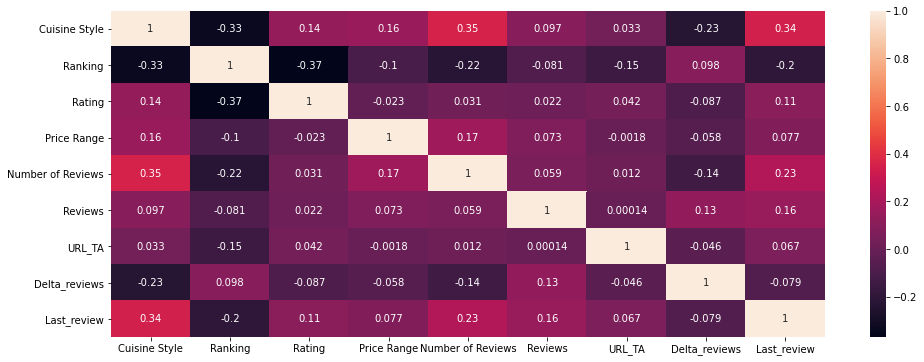

In [96]:
# представим корреляционную матрицу в виде "тепловой карты" с помощью функции heatmap из библиотеки seaborn
plt.figure(figsize=(16,6)) # размер графика
sns.heatmap(data=df2.corr(), annot=True)

## Пробуем заменить NaN признаки методами ML, 
сравнив качество такой замены с использованием среднего значения по MAE

In [97]:
# разделим данные на тренировочную и тестовую части:
df2_y = df2['Rating']
df2_X = df2.drop('Rating', axis = 1)
df2_X_train, df2_X_test, df2_y_train, df2_y_test = train_test_split(df2_X, df2_y, test_size=0.25)

In [98]:
df2_y_train.isna().sum()

0

In [99]:
df2_y_test.isna().sum()

0

In [100]:
df2_X_train

,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,Delta_reviews,Last_review
31551,5.0,510.0,2.0,83.0,62.0,98,5.0,2018.0
1649,6.0,1347.0,2.0,4.0,34.0,89,59.0,2017.0
27285,NaN,6519.0,NaN,7.0,NaN,90,NaN,NaN
8370,2.0,701.0,2.0,21.0,55.0,78,121.0,2017.0
3922,4.0,1218.0,2.0,39.0,47.0,97,2.0,2017.0
...,...,...,...,...,...,...,...,...
8537,3.0,3237.0,2.0,159.0,51.0,73,151.0,2017.0
32842,2.0,2952.0,2.0,NaN,NaN,68,NaN,NaN
4862,3.0,468.0,2.0,103.0,73.0,82,16.0,2018.0
39140,2.0,1517.0,NaN,14.0,52.0,85,6.0,2017.0


In [101]:
df2_X_train.dropna()

,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,Delta_reviews,Last_review
31551,5.0,510.0,2.0,83.0,62.0,98,5.0,2018.0
1649,6.0,1347.0,2.0,4.0,34.0,89,59.0,2017.0
8370,2.0,701.0,2.0,21.0,55.0,78,121.0,2017.0
3922,4.0,1218.0,2.0,39.0,47.0,97,2.0,2017.0
893,3.0,3198.0,1.0,30.0,23.0,79,224.0,2017.0
...,...,...,...,...,...,...,...,...
19902,1.0,1052.0,2.0,8.0,44.0,84,10.0,2017.0
21018,7.0,1078.0,2.0,118.0,58.0,86,23.0,2017.0
8537,3.0,3237.0,2.0,159.0,51.0,73,151.0,2017.0
4862,3.0,468.0,2.0,103.0,73.0,82,16.0,2018.0


In [102]:
# Создать дф с заполненными на значениями для использования в замене на значений методами МЛ
nan_filled = df2_X_train.copy()

In [103]:
nan_filled = fill_na_mean(nan_filled)

In [104]:
nan_filled# = fill_na_mean(df2_X_train)
nan_filled

,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,Delta_reviews,Last_review
31551,5.000000,510.0,2.000000,83.000000,62.000000,98,5.000000,2018.000000
1649,6.000000,1347.0,2.000000,4.000000,34.000000,89,59.000000,2017.000000
27285,3.113731,6519.0,1.813671,7.000000,47.839637,90,123.089308,2016.778743
8370,2.000000,701.0,2.000000,21.000000,55.000000,78,121.000000,2017.000000
3922,4.000000,1218.0,2.000000,39.000000,47.000000,97,2.000000,2017.000000
...,...,...,...,...,...,...,...,...
8537,3.000000,3237.0,2.000000,159.000000,51.000000,73,151.000000,2017.000000
32842,2.000000,2952.0,2.000000,123.179984,47.839637,68,123.089308,2016.778743
4862,3.000000,468.0,2.000000,103.000000,73.000000,82,16.000000,2018.000000
39140,2.000000,1517.0,1.813671,14.000000,52.000000,85,6.000000,2017.000000


In [105]:
fill_na_mean(df2_X_train)

,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,Delta_reviews,Last_review
31551,5.000000,510.0,2.000000,83.000000,62.000000,98,5.000000,2018.000000
1649,6.000000,1347.0,2.000000,4.000000,34.000000,89,59.000000,2017.000000
27285,3.113731,6519.0,1.813671,7.000000,47.839637,90,123.089308,2016.778743
8370,2.000000,701.0,2.000000,21.000000,55.000000,78,121.000000,2017.000000
3922,4.000000,1218.0,2.000000,39.000000,47.000000,97,2.000000,2017.000000
...,...,...,...,...,...,...,...,...
8537,3.000000,3237.0,2.000000,159.000000,51.000000,73,151.000000,2017.000000
32842,2.000000,2952.0,2.000000,123.179984,47.839637,68,123.089308,2016.778743
4862,3.000000,468.0,2.000000,103.000000,73.000000,82,16.000000,2018.000000
39140,2.000000,1517.0,1.813671,14.000000,52.000000,85,6.000000,2017.000000


Непосредственный тест использования ML на колонке Cuisine Style:

In [106]:
# Заполняет NaN значения столбца Cuisine Style:
# При этом исключаем NaN значения искомого столбца на этапе тренировки 
# (заменять их средним и т.п. смысла нет, т.к. это снижает эффективность замены методами ML)
y = df2_X_train[df2_X_train['Cuisine Style'].notna()]['Cuisine Style']

# При формировании X используем nan_filled для получения дф без нан значений
X = nan_filled[df2_X_train['Cuisine Style'].notna()].drop('Cuisine Style', axis = 1)

In [107]:
X

,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,Delta_reviews,Last_review
31551,510.0,2.000000,83.000000,62.000000,98,5.000000,2018.000000
1649,1347.0,2.000000,4.000000,34.000000,89,59.000000,2017.000000
8370,701.0,2.000000,21.000000,55.000000,78,121.000000,2017.000000
3922,1218.0,2.000000,39.000000,47.000000,97,2.000000,2017.000000
893,3198.0,1.000000,30.000000,23.000000,79,224.000000,2017.000000
...,...,...,...,...,...,...,...
8537,3237.0,2.000000,159.000000,51.000000,73,151.000000,2017.000000
32842,2952.0,2.000000,123.179984,47.839637,68,123.089308,2016.778743
4862,468.0,2.000000,103.000000,73.000000,82,16.000000,2018.000000
39140,1517.0,1.813671,14.000000,52.000000,85,6.000000,2017.000000


In [108]:
y

31551    5.0
1649     6.0
8370     2.0
3922     4.0
893      3.0
        ... 
8537     3.0
32842    2.0
4862     3.0
39140    2.0
15790    1.0
Name: Cuisine Style, Length: 23028, dtype: float64

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [110]:
# Создаём модель
regr = RandomForestRegressor(n_estimators=100)

# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

In [111]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 1.1251997394702562


In [112]:
y_test.mean()

3.1094224924012157

In [113]:
y_test

15541    5.0
28846    8.0
31456    3.0
24612    5.0
28290    3.0
        ... 
30714    2.0
33369    5.0
26577    4.0
21962    1.0
26820    8.0
Name: Cuisine Style, Length: 4606, dtype: float64

In [114]:
y_test[:2310]

15541    5.0
28846    8.0
31456    3.0
24612    5.0
28290    3.0
        ... 
6731     1.0
21260    5.0
6472     1.0
30925    7.0
26764    2.0
Name: Cuisine Style, Length: 2310, dtype: float64

In [115]:
y_test[2310:]

1806     5.0
29210    5.0
34027    5.0
20624    8.0
18408    1.0
        ... 
30714    2.0
33369    5.0
26577    4.0
21962    1.0
26820    8.0
Name: Cuisine Style, Length: 2296, dtype: float64

In [116]:
(y_test[:2310]-y_test[2310:].mean()).sum()/2310

0.07749445676274942

In [117]:
temp = y_test[:-1]

In [118]:
(len(y_test)/2)

2303.0

In [119]:
(temp[:int(len(temp)/2)]-temp[int(len(temp)/2):].mean()).sum()/(int(len(temp)/2))

0.08039451431348014

In [120]:
int(len(temp)/2)

2302

In [121]:
temp[int(len(temp)/2):].mean()

3.068171949630916

In [122]:
mean_MAE(temp)

0.08039451431348014

In [123]:
# Взятие среднего значения дает меньший показатель MAE, 
# чем использование ML, следовательно NaN значения будем заменять на среднее 

In [124]:
# Попробуем использовать ML для замены NaN значения столбцов с большим разбросом.

In [125]:
# Предсказание столбца Cuisine Style с использованием функции (не пошагово), 
# результат аналогичный (как, собственно, и должно быть, т.к. суть та же)
regr = ML_train(RandomForestRegressor(n_estimators=100), dataframe=df2_X_train, column='Cuisine Style', test_size=0.2)

MAE: 1.1194876248371688


In [126]:
# Используем линейную регрессию:
regr = ML_train(LinearRegression(normalize=True), dataframe=df2_X_train, column='Cuisine Style', test_size=0.2)

MAE: 1.2349910266466149


In [127]:
# Результат еще хуже

In [128]:
# Попробуем предсказать значения столбца 'Ranking':
regr = ML_train(RandomForestRegressor(n_estimators=100), dataframe=df2_X_train, column='Ranking', test_size=0.2)

MAE: 2454.615592677283


In [129]:
# Вычислим MAE при замене средним значением:
mean_MAE(df2_X_train['Ranking'])

-17.56860000000004

# Проверка модели:

In [130]:
regr = ML_train(RandomForestRegressor(n_estimators=100), dataframe=df2, column='Rating', test_size=0.25)

MAE: 0.3857703333333333


## Лишь немногим лучше, чем предыдущий результат

--------------

# Формирование признаков с использованием get_dummies

In [131]:
df3 = df2.copy()

In [132]:
df

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963
...,...,...,...,...,...,...,...,...,...,...
39995,id_499,Milan,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,4.5,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414
39996,id_6340,Paris,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,3.5,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036
39997,id_1649,Stockholm,"['Japanese', 'Sushi']",1652.0,4.5,NaN,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615
39998,id_640,Warsaw,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,4.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838


In [133]:
pd.get_dummies(df['City'])

,Amsterdam,Athens,Barcelona,Berlin,Bratislava,Brussels,Budapest,Copenhagen,Dublin,Edinburgh,...,Munich,Oporto,Oslo,Paris,Prague,Rome,Stockholm,Vienna,Warsaw,Zurich
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
39997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
39998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [134]:
df3.join(pd.get_dummies(df['City']), how='right')

,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,Delta_reviews,Last_review,Amsterdam,...,Munich,Oporto,Oslo,Paris,Prague,Rome,Stockholm,Vienna,Warsaw,Zurich
0,3.0,5570.0,3.5,2.0,194.0,53.0,75,41.0,2017.0,0,...,0,0,0,1,0,0,0,0,0,0
1,NaN,1537.0,4.0,NaN,10.0,41.0,71,382.0,2017.0,0,...,0,0,0,0,0,0,1,0,0,0
2,7.0,353.0,4.5,3.0,688.0,40.0,76,2.0,2018.0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,3458.0,5.0,NaN,3.0,NaN,65,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0
4,3.0,621.0,4.0,2.0,84.0,81.0,104,272.0,2017.0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,4.0,500.0,4.5,2.0,79.0,68.0,75,34.0,2017.0,0,...,0,0,0,0,0,0,0,0,0,0
39996,5.0,6341.0,3.5,2.0,542.0,67.0,80,9.0,2017.0,0,...,0,0,0,1,0,0,0,0,0,0
39997,2.0,1652.0,4.5,NaN,4.0,74.0,71,3127.0,2016.0,0,...,0,0,0,0,0,0,1,0,0,0
39998,5.0,641.0,4.0,2.0,70.0,53.0,122,23.0,2017.0,0,...,0,0,0,0,0,0,0,0,1,0


In [135]:
df3 = df3.join(pd.get_dummies(df['City']), how='right')
df3

,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,Delta_reviews,Last_review,Amsterdam,...,Munich,Oporto,Oslo,Paris,Prague,Rome,Stockholm,Vienna,Warsaw,Zurich
0,3.0,5570.0,3.5,2.0,194.0,53.0,75,41.0,2017.0,0,...,0,0,0,1,0,0,0,0,0,0
1,NaN,1537.0,4.0,NaN,10.0,41.0,71,382.0,2017.0,0,...,0,0,0,0,0,0,1,0,0,0
2,7.0,353.0,4.5,3.0,688.0,40.0,76,2.0,2018.0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,3458.0,5.0,NaN,3.0,NaN,65,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0
4,3.0,621.0,4.0,2.0,84.0,81.0,104,272.0,2017.0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,4.0,500.0,4.5,2.0,79.0,68.0,75,34.0,2017.0,0,...,0,0,0,0,0,0,0,0,0,0
39996,5.0,6341.0,3.5,2.0,542.0,67.0,80,9.0,2017.0,0,...,0,0,0,1,0,0,0,0,0,0
39997,2.0,1652.0,4.5,NaN,4.0,74.0,71,3127.0,2016.0,0,...,0,0,0,0,0,0,1,0,0,0
39998,5.0,641.0,4.0,2.0,70.0,53.0,122,23.0,2017.0,0,...,0,0,0,0,0,0,0,0,1,0


In [136]:
df['Cuisine Style'].fillna('Other')

0                  ['European', 'French', 'International']
1                                                    Other
2        ['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...
3                                                    Other
4        ['German', 'Central European', 'Vegetarian Fri...
                               ...                        
39995    ['Italian', 'Vegetarian Friendly', 'Vegan Opti...
39996    ['French', 'American', 'Bar', 'European', 'Veg...
39997                                ['Japanese', 'Sushi']
39998    ['Polish', 'European', 'Eastern European', 'Ce...
39999                                          ['Spanish']
Name: Cuisine Style, Length: 40000, dtype: object

In [137]:
cuisines = set()
for cuisines_list in df['Cuisine Style'].fillna('Other'):
    for cuisine in cuisines_list.replace('[','').replace(']','').replace(' ','').replace("'",'').split(','):
        cuisines.add(cuisine)

In [138]:
cuisines

{'Afghani',
 'African',
 'Albanian',
 'American',
 'Arabic',
 'Argentinean',
 'Armenian',
 'Asian',
 'Australian',
 'Austrian',
 'Azerbaijani',
 'Balti',
 'Bangladeshi',
 'Bar',
 'Barbecue',
 'Belgian',
 'Brazilian',
 'BrewPub',
 'British',
 'Burmese',
 'Cafe',
 'Cajun&Creole',
 'Cambodian',
 'Canadian',
 'Caribbean',
 'Caucasian',
 'CentralAmerican',
 'CentralAsian',
 'CentralEuropean',
 'Chilean',
 'Chinese',
 'Colombian',
 'Contemporary',
 'Croatian',
 'Cuban',
 'Czech',
 'Danish',
 'Delicatessen',
 'Diner',
 'Dutch',
 'EasternEuropean',
 'Ecuadorean',
 'Egyptian',
 'Ethiopian',
 'European',
 'FastFood',
 'Filipino',
 'French',
 'Fujian',
 'Fusion',
 'Gastropub',
 'Georgian',
 'German',
 'GlutenFreeOptions',
 'Greek',
 'Grill',
 'Halal',
 'Hawaiian',
 'Healthy',
 'Hungarian',
 'Indian',
 'Indonesian',
 'International',
 'Irish',
 'Israeli',
 'Italian',
 'Jamaican',
 'Japanese',
 'Korean',
 'Kosher',
 'Latin',
 'Latvian',
 'Lebanese',
 'Malaysian',
 'Mediterranean',
 'Mexican',
 'Mid

In [139]:
for cuisine in cuisines:
    df3[cuisine] = df['Cuisine Style'].fillna('Other').apply(find_cuisine)

In [140]:
df3

,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,Delta_reviews,Last_review,Amsterdam,...,Belgian,SriLankan,Malaysian,Tunisian,Jamaican,Latin,Afghani,Southwestern,Welsh,Steakhouse
0,3.0,5570.0,3.5,2.0,194.0,53.0,75,41.0,2017.0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,1537.0,4.0,NaN,10.0,41.0,71,382.0,2017.0,0,...,0,0,0,0,0,0,0,0,0,0
2,7.0,353.0,4.5,3.0,688.0,40.0,76,2.0,2018.0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,3458.0,5.0,NaN,3.0,NaN,65,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0
4,3.0,621.0,4.0,2.0,84.0,81.0,104,272.0,2017.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,4.0,500.0,4.5,2.0,79.0,68.0,75,34.0,2017.0,0,...,0,0,0,0,0,0,0,0,0,0
39996,5.0,6341.0,3.5,2.0,542.0,67.0,80,9.0,2017.0,0,...,0,0,0,0,0,0,0,0,0,0
39997,2.0,1652.0,4.5,NaN,4.0,74.0,71,3127.0,2016.0,0,...,0,0,0,0,0,0,0,0,0,0
39998,5.0,641.0,4.0,2.0,70.0,53.0,122,23.0,2017.0,0,...,0,0,0,0,0,0,0,0,0,0


In [141]:
df

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963
...,...,...,...,...,...,...,...,...,...,...
39995,id_499,Milan,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,4.5,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414
39996,id_6340,Paris,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,3.5,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036
39997,id_1649,Stockholm,"['Japanese', 'Sushi']",1652.0,4.5,NaN,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615
39998,id_640,Warsaw,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,4.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838


In [197]:
df3

,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,Delta_reviews,Last_review,Amsterdam,...,soft,spoiled,bland,too,sweet,terrible,rotten,creamy,exellent,nutritious
0,3.0,5570.0,3.5,2.0,194.0,53.0,75,41.0,2017.0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,1537.0,4.0,NaN,10.0,41.0,71,382.0,2017.0,0,...,0,0,0,0,0,0,0,0,0,0
2,7.0,353.0,4.5,3.0,688.0,40.0,76,2.0,2018.0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,3458.0,5.0,NaN,3.0,NaN,65,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0
4,3.0,621.0,4.0,2.0,84.0,81.0,104,272.0,2017.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,4.0,500.0,4.5,2.0,79.0,68.0,75,34.0,2017.0,0,...,0,0,0,0,0,0,0,0,0,0
39996,5.0,6341.0,3.5,2.0,542.0,67.0,80,9.0,2017.0,0,...,0,0,0,0,0,0,0,0,0,0
39997,2.0,1652.0,4.5,NaN,4.0,74.0,71,3127.0,2016.0,0,...,0,0,0,0,0,0,0,0,0,0
39998,5.0,641.0,4.0,2.0,70.0,53.0,122,23.0,2017.0,0,...,0,0,0,0,0,0,0,0,0,0


## Пробуем проверить модель:

In [142]:
regr = ML_train(RandomForestRegressor(n_estimators=100), dataframe=df3, column='Rating', test_size=0.25)

MAE: 0.22075299999999998


In [143]:
regr = ML_train(RandomForestRegressor(n_estimators=120), dataframe=df3, column='Rating', test_size=0.25)

MAE: 0.22975458333333335


In [144]:
regr = ML_train(RandomForestRegressor(n_estimators=10), dataframe=df3, column='Rating', test_size=0.25)

MAE: 0.22799499999999998


In [145]:
regr = ML_train(RandomForestRegressor(n_estimators=50), dataframe=df3, column='Rating', test_size=0.25)

MAE: 0.229217


## Попробуем заменить NaN значения методами ML используя новый датафрейм

In [146]:
regr = ML_train(RandomForestRegressor(n_estimators=100), dataframe=df3.drop('Rating', axis=1),
                column='Cuisine Style', test_size=0.25)

MAE: 0.6451640625


In [147]:
regr = ML_train(RandomForestRegressor(n_estimators=50), dataframe=df3,
                column='Cuisine Style', test_size=0.25)

MAE: 0.63815625


In [148]:
regr = ML_train(RandomForestRegressor(n_estimators=100), dataframe=df3.drop('Rating', axis=1), 
                column='Ranking', test_size=0.25)

MAE: 1242.3847620366814


In [149]:
regr = ML_train(RandomForestRegressor(n_estimators=100), dataframe=df3, 
                column='Ranking', test_size=0.25)

MAE: 603.9264117538961


In [150]:
mean_MAE(df3['Ranking'])

9.85814999999993

## get_dummies for reviews

In [151]:
df['Reviews'].iloc[0].lower()[0:-2]

"[['good food at your doorstep', 'a good hotel restaurant'], ['12/31/2017', '11/20/2017'"

In [152]:
re.sub(r'[0-9\,\[\]]+', '', df['Reviews'].iloc[0].lower())

"'good food at your doorstep' 'a good hotel restaurant' '//' '//'"

In [153]:
re.sub(r'[0-9\,\[\]]+', '', df['Reviews'].iloc[0].lower())

"'good food at your doorstep' 'a good hotel restaurant' '//' '//'"

In [154]:
re.findall(r'[a-z]+', df['Reviews'].iloc[0].lower())

['good', 'food', 'at', 'your', 'doorstep', 'a', 'good', 'hotel', 'restaurant']

In [155]:
#В последствии использовать для слов "не ..." (еда не хорошая, не качественное обслуживание и т.д.)
re.findall(r'food.[a-z]+', df['Reviews'].iloc[0].lower())

['food at']

In [156]:
re.sub(r'food.[a-z]+', '', df['Reviews'].iloc[0].lower())

"[['good  your doorstep', 'a good hotel restaurant'], ['12/31/2017', '11/20/2017']]"

In [157]:
st = df['Reviews'].iloc[0].lower()

In [158]:
re.findall(r'food[o..].[a-z]+', df['Reviews'].iloc[0].lower())

[]

In [159]:
re.findall(r'f[o,d]+.[a-z]+', df['Reviews'].iloc[0].lower())

['food at']

In [160]:
re.sub(r'f[o,d]+.[a-z]+', '', df['Reviews'].iloc[0].lower())

"[['good  your doorstep', 'a good hotel restaurant'], ['12/31/2017', '11/20/2017']]"

In [161]:
re.findall(r'[a-z]+', re.sub(r'f[o,d]+.[a-z]+', '', df['Reviews'].iloc[0].lower()))

['good', 'your', 'doorstep', 'a', 'good', 'hotel', 'restaurant']

In [162]:
devide_words(df['Reviews'].iloc[0])

{'a', 'at', 'doorstep', 'food', 'good', 'hotel', 'restaurant', 'your'}

In [163]:
df['Reviews'].apply(devide_words)

0        {food, good, hotel, restaurant, doorstep, your...
1             {food, nepalese, cuisine, unique, delicious}
2              {up, catch, friends, not exceptional, with}
3                                                       {}
4        {food, try, but, best, a, need, nice, improvem...
                               ...                        
39995    {experience, food, real, italian, the, wonderful}
39996    {decor, good, bit, but, atmosphere, pricey, i,...
39997    {jewel, hidden, good, by, stertorp, a, of, mid...
39998    {oldest, restaura, restaurant, underground, wa...
39999                        {an, nice, average, informal}
Name: Reviews, Length: 40000, dtype: object

In [164]:
all_reviews_words = set()
all_reviews_words.clear()

In [165]:
for i in df['Reviews'].apply(devide_words):
    all_reviews_words.update(i)

In [166]:
all_reviews_words

{'picasso',
 'coalescare',
 'caf',
 'disappoin',
 'restraunt',
 'duty',
 'not brilliant',
 'done',
 'earth',
 'servixe',
 'support',
 'dongle',
 'several',
 'johnny',
 'fond',
 'grossly',
 'not fine',
 'standing',
 'val',
 'skippers',
 'mange',
 'konditori',
 'candle',
 'galicien',
 'urban',
 'exoerience',
 'competative',
 'shops',
 'execelle',
 'frequent',
 'ab',
 'eh',
 'kababs',
 'fren',
 'veneto',
 'pastel',
 'microonde',
 'promissing',
 'bands',
 'produce',
 'camarao',
 'superrrrrrrr',
 'especia',
 'georgian',
 'climb',
 'presid',
 'corsica',
 'lucky',
 'speci',
 'cuba',
 'zizzi',
 'english',
 'not food',
 'bom',
 'deapoi',
 'eww',
 'ovely',
 'chri',
 'format',
 'furious',
 'casera',
 'opening',
 'menues',
 'nod',
 'avec',
 'produits',
 'manel',
 'lemons',
 'warszawa',
 'dials',
 'nobb',
 'airplan',
 'mandarin',
 'ib',
 'adi',
 'addict',
 'halal',
 'cousy',
 'gr',
 'goosey',
 'shank',
 'envi',
 'particularlt',
 'downpour',
 'eclectic',
 'maggiore',
 'moved',
 'hosts',
 'tripadviso

In [167]:
len(all_reviews_words)

12991

for word in all_reviews_words:
    df3[word] = df['Reviews'].apply(find_word)

In [168]:
# Получается слишком много для перебора, попробуем использовать наличие некоторых позитивных и негативных слов

In [169]:
good_words = {'good', 'exellent', 'wonderfull',
              'tasty', 'delicious', 'jummy',
              'sweet', 'fresh', 'healthy', 'ripe',
              'soft', 'delicate', 'creamy',
              'nutritious', 'substantial', 'well-done'}

bad_words = {'no', 'not', 'bad', 'horrible', 'terrible',
             'too', 'hideous', 'salty', 'bitter',
             'unripe', 'rotten', 'spoiled', 'tough',
             'stale', 'undercooked', 'overcooked',
             'bitter', 'bland', 'tasteless', 'unhealthy'}

In [170]:
describing_words = set()
describing_words.update(good_words, bad_words)
describing_words

{'bad',
 'bitter',
 'bland',
 'creamy',
 'delicate',
 'delicious',
 'exellent',
 'fresh',
 'good',
 'healthy',
 'hideous',
 'horrible',
 'jummy',
 'no',
 'not',
 'nutritious',
 'overcooked',
 'ripe',
 'rotten',
 'salty',
 'soft',
 'spoiled',
 'stale',
 'substantial',
 'sweet',
 'tasteless',
 'tasty',
 'terrible',
 'too',
 'tough',
 'undercooked',
 'unhealthy',
 'unripe',
 'well-done',
 'wonderfull'}

In [171]:
def find_word(cell):
    if word in cell:
        return 1
    return 0

In [172]:
for word in describing_words:
    df3[word] = df['Reviews'].apply(find_word)

In [173]:
df3

,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,Delta_reviews,Last_review,Amsterdam,...,soft,spoiled,bland,too,sweet,terrible,rotten,creamy,exellent,nutritious
0,3.0,5570.0,3.5,2.0,194.0,53.0,75,41.0,2017.0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,1537.0,4.0,NaN,10.0,41.0,71,382.0,2017.0,0,...,0,0,0,0,0,0,0,0,0,0
2,7.0,353.0,4.5,3.0,688.0,40.0,76,2.0,2018.0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,3458.0,5.0,NaN,3.0,NaN,65,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0
4,3.0,621.0,4.0,2.0,84.0,81.0,104,272.0,2017.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,4.0,500.0,4.5,2.0,79.0,68.0,75,34.0,2017.0,0,...,0,0,0,0,0,0,0,0,0,0
39996,5.0,6341.0,3.5,2.0,542.0,67.0,80,9.0,2017.0,0,...,0,0,0,0,0,0,0,0,0,0
39997,2.0,1652.0,4.5,NaN,4.0,74.0,71,3127.0,2016.0,0,...,0,0,0,0,0,0,0,0,0,0
39998,5.0,641.0,4.0,2.0,70.0,53.0,122,23.0,2017.0,0,...,0,0,0,0,0,0,0,0,0,0


In [174]:
# Проверим модель с использованием слов описаний:
regr = ML_train(RandomForestRegressor(n_estimators=100), dataframe=df3, column='Rating', test_size=0.25)

MAE: 0.22578


In [175]:
# Результат не изменился

In [176]:
regr = ML_train(RandomForestRegressor(n_estimators=200), dataframe=df3, column='Rating', test_size=0.25)

MAE: 0.231267


In [177]:
df

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963
...,...,...,...,...,...,...,...,...,...,...
39995,id_499,Milan,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,4.5,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414
39996,id_6340,Paris,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,3.5,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036
39997,id_1649,Stockholm,"['Japanese', 'Sushi']",1652.0,4.5,NaN,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615
39998,id_640,Warsaw,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,4.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838


In [186]:
counts.loc['id_871']

18

In [196]:
def network_large(idx, counts):
    #idx = line#['Restaurant_id']
    return counts.loc[idx]

In [179]:
counts = df['Restaurant_id'].value_counts()
counts

id_871      18
id_227      18
id_436      18
id_633      18
id_585      17
            ..
id_10564     1
id_4684      1
id_14359     1
id_9539      1
id_14515     1
Name: Restaurant_id, Length: 11909, dtype: int64

In [181]:
%%timeit
df['Restaurant_id'][0:10000].apply(lambda x: network_large(x, counts))

9.74 s ± 110 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [190]:
%%timeit
df['Restaurant_id'][0:1000].apply(lambda x: network_large(x, counts))

17.8 ms ± 134 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [191]:
%%timeit
df['Restaurant_id'][0:10000].apply(lambda x: network_large(x, counts))

174 ms ± 1.89 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [195]:
%%timeit
df['Restaurant_id'][0:10000].apply(lambda x: network_large(x))

183 ms ± 5.33 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [184]:
#df['Restaurant_id'].apply(lambda x: network_large(x, counts))

0         3
1        10
2         8
3         4
4        14
         ..
39995    14
39996     2
39997    10
39998     8
39999     4
Name: Restaurant_id, Length: 40000, dtype: int64